In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
df = pd.read_csv(r'C:\Users\varre\OneDrive\Desktop\D.A\Portfolio\project4pythonD.correlation\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#how=all will drop only if everythign is null in the row 
df = df.dropna(how='any',axis=0)    


In [5]:
for col in df.columns:
    percnt_missing = np.mean(df[col].isnull())
    print('{} - {} %'.format(col,percnt_missing))

name - 0.0 %
rating - 0.0 %
genre - 0.0 %
year - 0.0 %
released - 0.0 %
score - 0.0 %
votes - 0.0 %
director - 0.0 %
writer - 0.0 %
star - 0.0 %
country - 0.0 %
budget - 0.0 %
gross - 0.0 %
company - 0.0 %
runtime - 0.0 %


In [6]:
# converting dtypes of budget n gross into int

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [8]:
#splitting the info in Released column to get the year seperately 
#df['year_corrected']=df['released'].str.split('()').str[1]

df['year_corrected']=df['released'].str.split('(').str[0]


In [9]:
df['year_corrected']=df['year_corrected'].str.split(',').str[1]

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
# so far data we need is clear and duplicates here can be expected as same company can produce more films 


df.sort_values(by =['gross'],ascending=False,inplace = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
# since there are only few rows visible, we cans et_option to display all rows  

# mistake is I have done it for daframe but pandas itself need to be corrected

pd.set_option('display.max_rows',None)

In [13]:

df_sorted = df.sort_values(by =['budget'],ascending=False,inplace = False)
df_sorted.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007


In [16]:
# currently there is no need to delete the duplicates but , if we want , then the below steps are for that .

# to make sure what are values having duplicates , we use the below syntax
df['runtime'].drop_duplicates().sort_values(ascending=True) 


# to drop the duplicates, we use this syntax

#df['company']= df['company'].drop_duplicates().sort_values(ascending=True)  

# if all duplicates of dataframe need to be removed

#df.drop_duplicates()

5985     63.0
1271     69.0
2381     71.0
4207     72.0
3580     73.0
902      74.0
3199     75.0
2098     76.0
405      77.0
185      78.0
550      79.0
379      80.0
372      81.0
223      82.0
117      83.0
165      84.0
96       85.0
880      86.0
110      87.0
3        88.0
18       89.0
197      90.0
36       91.0
113      92.0
173      93.0
48       94.0
5        95.0
23       96.0
33       97.0
4        98.0
95       99.0
9       100.0
37      101.0
20      102.0
15      103.0
1       104.0
286     105.0
103     106.0
146     107.0
98      108.0
11      109.0
108     110.0
398     111.0
660     112.0
216     113.0
12      114.0
77      115.0
10      116.0
29      117.0
99      118.0
189     119.0
227     120.0
56      121.0
134     122.0
106     123.0
2       124.0
118     125.0
114     126.0
8       127.0
257     128.0
7       129.0
870     130.0
28      131.0
354     132.0
6       133.0
356     134.0
1146    135.0
233     136.0
476     137.0
503     138.0
2094    139.0
100   

[]

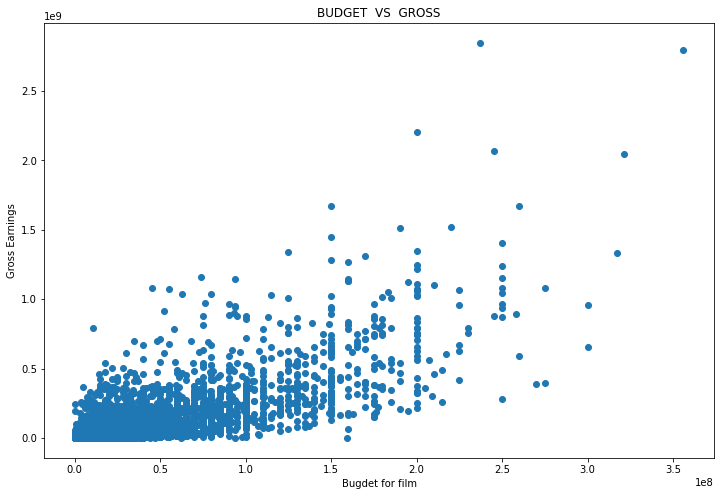

In [40]:
# so ,in general we can normalise the information , if we can find data with alsmost same name but here it is different as few companies 
# might have similar name but all of them are of different period , so we need to keep them like that.

# making hypothesis that budget and company might be the ones more corrleated and affect the gross'

#since budget and gross are numerical data . we can use scatter plot as well as linear regression 

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('BUDGET  VS  GROSS')
plt.xlabel('Bugdet for film')
plt.ylabel('Gross Earnings')
plt.plot()



<AxesSubplot:xlabel='budget', ylabel='gross'>

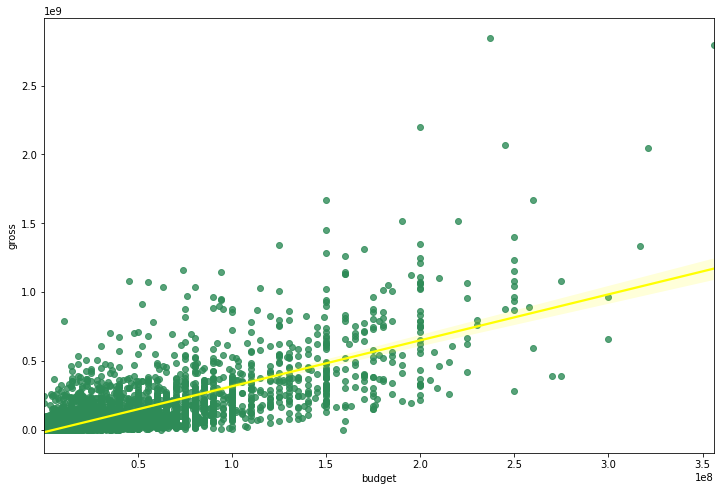

In [51]:
# regression plot using seaborn  

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'seagreen'},line_kws={'color':'yellow'})


In [57]:
# this shows good correlation between gross and budget 

#df.corrwith(df['gross'])     , if we want only with one column 

df.corr()         #person, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


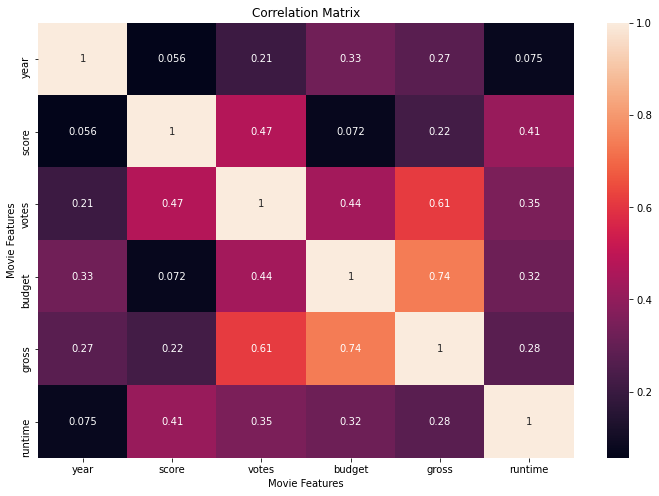

In [60]:
# the above all columns are numeric and votes, budget have high impact , but we want to check with other object type columns also 

# before that we would make a heatmap for the correlated matrix

cor_mat = df.corr()

sns.heatmap(cor_mat,annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [22]:
df_numerzd =df

for col in df_numerzd.columns:
    if (df_numerzd[col].dtype == 'object'):
        df_numerzd[col]=df_numerzd[col].astype('category')
        df_numerzd[col]=df_numerzd[col].cat.codes
        

# to give unique numbers to object  we give cat.codes  
#df_numerzd.head() 
df_numerzd.tail()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,40
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,40
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,40
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,40
7652,4090,3,0,2020,370,6.8,3700.0,746,1184,1839,8,80000000,461421559,228,149.0,40


In [23]:
# to find correlation between all factors 
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026759
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019560
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.070699
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.996723
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005141
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.062648
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.204183
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035738
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023603
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.030840


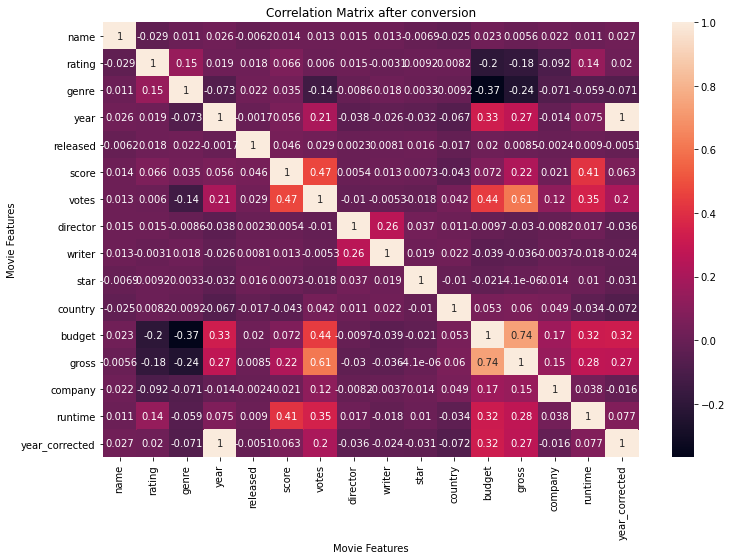

In [65]:
new_mat  = df.corr()

sns.heatmap(new_mat,annot=True)
plt.title('Correlation Matrix after conversion')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [74]:
# we can draw correaltion only for gross with respect to othe movie features 
final_corr = df.corrwith(df['gross'])


final_corr

name              0.005639
rating           -0.181906
genre            -0.244101
year              0.274321
released          0.008501
score             0.222556
votes             0.614751
director         -0.029560
writer           -0.035885
star             -0.000004
country           0.060078
budget            0.740247
gross             1.000000
company           0.149553
runtime           0.275796
year_corrected    0.269479
dtype: float64

In [ ]:
# so, instead of Company and Budget , the most correlated ones are Budget and Votes 